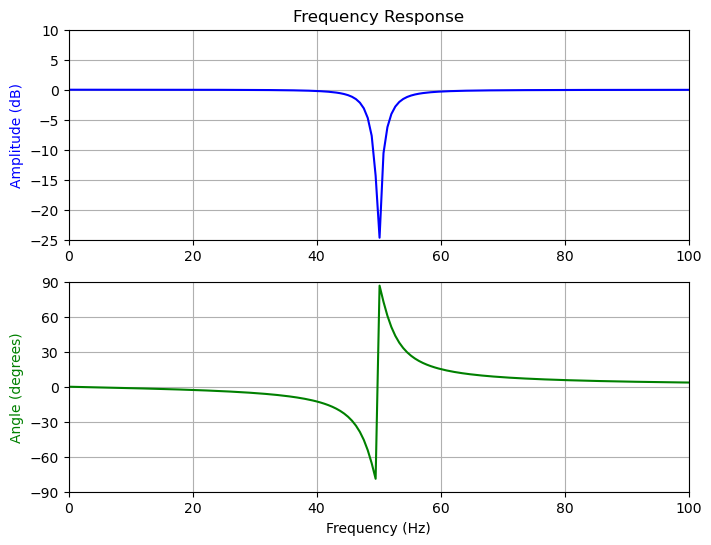

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

fs = 650.0  # Sample frequency (Hz)
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 10.0  # Quality factor
# Design notch filter
b, a = signal.iirnotch(f0, Q, fs)

# Frequency response
freq, h = signal.freqz(b, a, fs=fs)
# Plot
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0, 100])
ax[0].set_ylim([-25, 10])
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0, 100])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid(True)
plt.show()

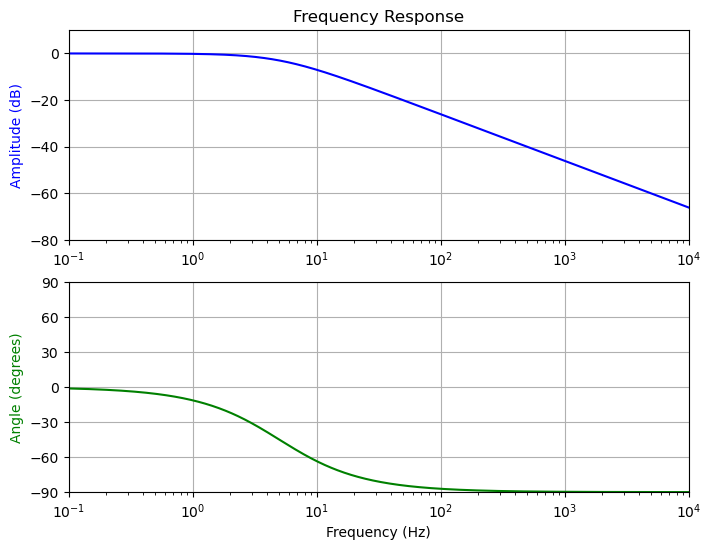

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the lowpass filter function
def lowpass_filter(data, R, C, fs=1000):
    """
    Low-pass filter a signal using a simple RC filter.
    data: input signal
    R: resistance in Ohm
    C: capacitance in Farad
    fs: sampling frequency in Hz
    """
    dt = 1.0 / fs  # Time step
    alpha = dt / (R * C + dt)  # Corrected alpha calculation
    y = np.zeros_like(data)
    y[0] = data[0]  # Initialize the first value of the output
    
    for i in range(1, len(data)):
        y[i] = (1 - alpha) * y[i - 1] + alpha * data[i]
    return y

# Function to compute the frequency response of the lowpass filter
def compute_frequency_response(R, C, fs=1000, num_points=1000):
    freqs = np.logspace(-1, 4, num_points)  # Frequencies from 0.1 Hz to 10,000 Hz
    omega = 2 * np.pi * freqs  # Angular frequencies
    H = 1 / (1 + 1j * omega * R * C)  # Transfer function of the RC low-pass filter
    return freqs, H

# Parameters
def calculate_rc(cutoff_freq, R=None, C=None):
    """
    Calculate the resistance (R) and capacitance (C) values for a given cutoff frequency.
    cutoff_freq: desired cutoff frequency in Hz
    R: resistance in Ohms (optional)
    C: capacitance in Farads (optional)
    """
    if R is None and C is None:
        raise ValueError("Either R or C must be provided.")
    
    if R is not None:
        C = 1 / (2 * np.pi * R * cutoff_freq)
    elif C is not None:
        R = 1 / (2 * np.pi * C * cutoff_freq)
    
    return R, C

R, C = calculate_rc(5, R=1)  # Calculate R and C for a cutoff frequency of 50 Hz
fs = 1000  # Sampling frequency

# Compute the frequency response
freqs, response = compute_frequency_response(R, C, fs, num_points=1000)

# Plot the frequency response
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].semilogx(freqs, 20 * np.log10(np.abs(response)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude (dB)", color='blue')
ax[0].set_xlim([0.1, 10000])
ax[0].set_ylim([-80, 10])
ax[0].grid(True)
ax[1].semilogx(freqs, np.angle(response) * 180 / np.pi, color='green')
ax[1].set_ylabel("Angle (degrees)", color='green')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_xlim([0.1, 10000])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid(True)
plt.show()

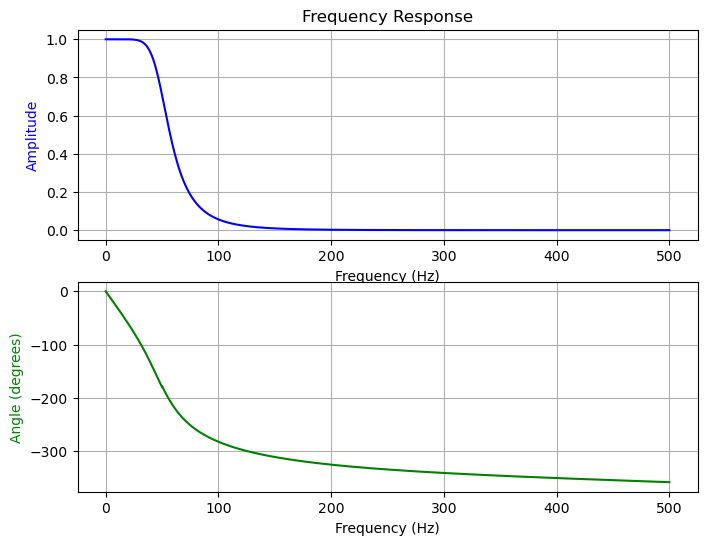

In [31]:
# plot the frequency response of a butter lowpass filter
from scipy.signal import butter, freqz
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Parameters
fs = 1000  # Sampling frequency
cutoff = 50  # Desired cutoff frequency of the filter in Hz
order = 4  # Filter order

# Compute the Nyquist frequency
nyquist = 0.5 * fs

# Design the Butterworth low-pass filter
b, a = butter(order, cutoff / nyquist, btype='low')

# Compute the frequency response of the filter
w, h = freqz(b, a, worN=8000)

# Plot the frequency response
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude", color='b')
ax[0].set_xlabel("Frequency (Hz)")
ax[0].grid()

# Convert phase from radians to degrees and plot
ax[1].plot(0.5 * fs * w / np.pi, np.unwrap(np.angle(h, deg=True)), 'g')
ax[1].set_ylabel("Angle (degrees)", color='g')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].grid()
plt.show()



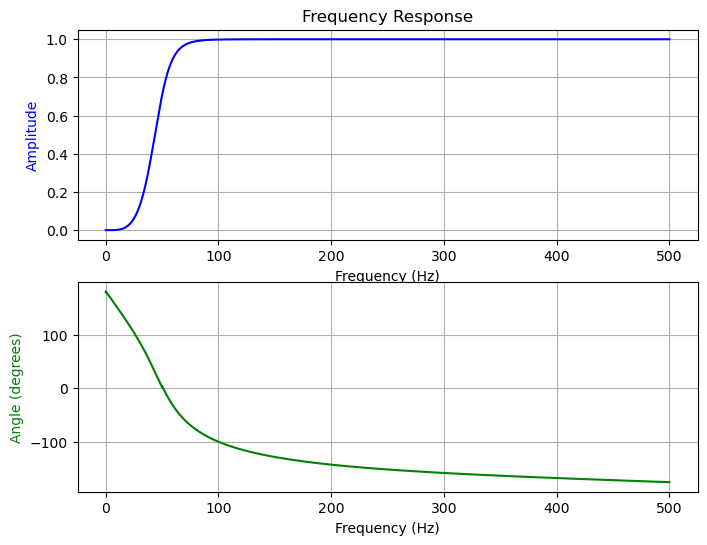

In [32]:
# plot highpass filter
# Parameters
fs = 1000  # Sampling frequency
cutoff = 50  # Desired cutoff frequency of the filter in Hz
order = 4

# Compute the Nyquist frequency
nyquist = 0.5 * fs

# Design the Butterworth high-pass filter
b, a = butter(order, cutoff / nyquist, btype='high')

# Compute the frequency response of the filter
w, h = freqz(b, a, worN=8000)

# Plot the frequency response
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude", color='b')
ax[0].set_xlabel("Frequency (Hz)")
ax[0].grid()

# Convert phase from radians to degrees and plot
ax[1].plot(0.5 * fs * w / np.pi, np.unwrap(np.angle(h, deg=True)), 'g')
ax[1].set_ylabel("Angle (degrees)", color='g')
ax[1].set_xlabel("Frequency (Hz)")
ax[1].grid()
plt.show()


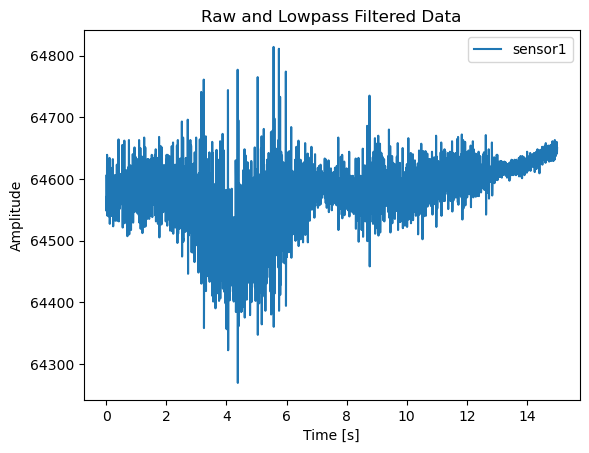

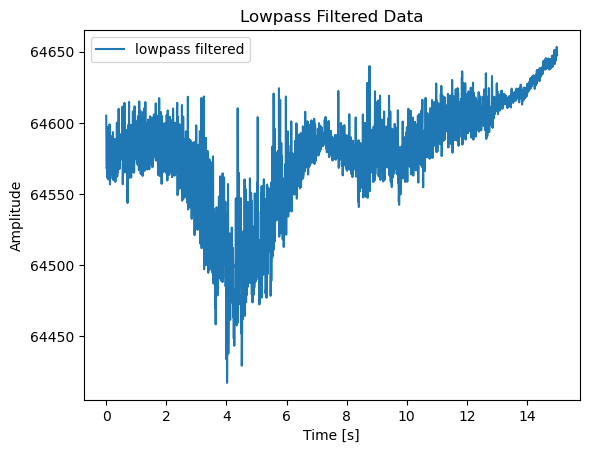

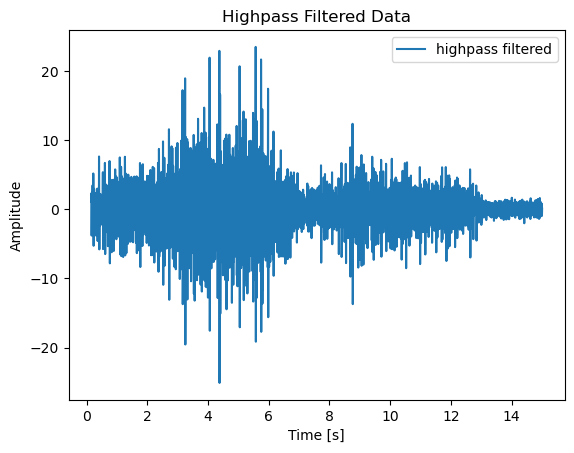

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the .npz file
path = 'C:\\Users\\emilr\\OneDrive\\Documents\\GitHub\\ElbowExo\\RawMeasurements\\BevægelseVertikaltFlexEx.npz'
data = np.load(path)['data']

# Extract the timestamps and the GSR data
timestamps = data[:, 0]
sensor1_data = data[:, 1]
sensor2_data = data[:, 2]  # Corrected to use the appropriate column
up = data[:, 3]
down = data[:, 4]

import numpy as np
import matplotlib.pyplot as plt

def calculate_rc(cutoff_freq, R=None, C=None):
    """
    Calculate the resistance (R) and capacitance (C) values for a given cutoff frequency.
    cutoff_freq: desired cutoff frequency in Hz
    R: resistance in Ohms (optional)
    C: capacitance in Farads (optional)
    """
    if R is None and C is None:
        raise ValueError("Either R or C must be provided.")
    
    if R is not None:
        C = 1 / (2 * np.pi * R * cutoff_freq)
    elif C is not None:
        R = 1 / (2 * np.pi * C * cutoff_freq)
    
    return R, C

# Define the lowpass filter function
def lowpass_filter(data, R, C, fs=1000):
    """
    Low-pass filter a signal using a simple RC filter.
    data: input signal
    R: resistance in Ohm
    C: capacitance in Farad
    fs: sampling frequency in Hz
    """
    dt = 1.0 / fs  # Time step
    alpha = dt / (R * C + dt)  # Corrected alpha calculation
    y = np.zeros_like(data)
    y[0] = data[0]  # Initialize the first value of the output
    
    for i in range(1, len(data)):
        y[i] = (1 - alpha) * y[i - 1] + alpha * data[i]
    return y

def highpass_filter(data, R, C, fs=1000):
    """
    High-pass filter a signal using a simple RC filter.
    data: input signal
    R: resistance in Ohm
    C: capacitance in Farad
    fs: sampling frequency in Hz
    """
    dt = 1.0 / fs  # Time step
    alpha = R / (R + dt / C)  # Corrected alpha calculation
    y = np.zeros_like(data)
    y[0] = data[0]  # Initialize the first value of the output
    
    for i in range(1, len(data)):
        y[i] = alpha * y[i - 1] + alpha * (data[i] - data[i - 1])
    return y


# Example usage
cutoff_freq = 20  # Desired cutoff frequency in Hz
R = 1000  # Example resistance value in Ohms
R, C = calculate_rc(cutoff_freq, R=R)

# Apply the lowpass filter
lowpass_filtered = lowpass_filter(sensor1_data, R, C, fs=650)

# Plot the raw and filtered data
plt.figure()
plt.plot(timestamps, sensor1_data, label='sensor1')
#plt.plot(timestamps, lowpass_filtered, label='lowpass filtered')
plt.legend()
plt.title('Raw and Lowpass Filtered Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()



# Plot the filtered data
plt.figure()
plt.plot(timestamps, lowpass_filtered, label='lowpass filtered')
plt.legend()
plt.title('Lowpass Filtered Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Apply the highpass filter
cutoff_freq = 150  # Desired cutoff frequency in Hz
R = 1000  # Example resistance value in Ohms
R, C = calculate_rc(cutoff_freq, R=R)
highpass_filtered = highpass_filter(lowpass_filtered, R, C, fs=650)

#remove first 100 samples
highpass_filtered = highpass_filtered[100:]
timestamps = timestamps[100:]

# Plot the filtered data
plt.figure()
plt.plot(timestamps, highpass_filtered, label='highpass filtered')
plt.legend()
plt.title('Highpass Filtered Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()



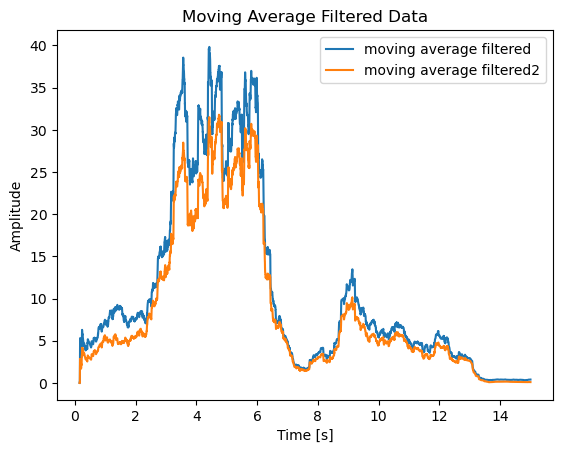

In [151]:
# apply moving average filter

def rolling_variance(data, window_size):
    """
    Calculate the rolling variance of a signal using a moving window.
    data: input signal
    window_size: size of the moving window
    """
    variance = np.zeros_like(data)
    
    for i in range(len(data)):
        if i < window_size:
            variance[i] = np.var(data[:i+1])
        else:
            variance[i] = np.var(data[i-window_size+1:i+1])
    
    return variance



#define notch as iirfilter
def notch_filter(data, f0, Q, fs=1000):
    """
    Apply a notch filter to a signal.
    data: input signal
    f0: frequency to be removed (Hz)
    Q: quality factor
    fs: sampling frequency (Hz)
    """
    b, a = signal.iirnotch(f0, Q, fs=fs)
    return signal.filtfilt(b, a, data)

# Apply the notch filter
notch_filtered = notch_filter(highpass_filtered, f0=50, Q=10, fs=650)

# Example usage
window_size = 300  # Example window size
moving_avg_filtered = rolling_variance(highpass_filtered, window_size)
moving_avg_filtered2 = rolling_variance(notch_filtered, window_size)

# Plot the filtered data
plt.figure()
plt.plot(timestamps, moving_avg_filtered, label='moving average filtered')
plt.plot(timestamps, moving_avg_filtered2, label='moving average filtered2')
plt.legend()
plt.title('Moving Average Filtered Data')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()